# IBM cloud deployment

Team ID - PNT2022TMID12666<br>
Project Name - A Novel Method for Handwritten Digit Recognition System

# Importing the required libraries

In [1]:
!pip install keras
!pip install tensorflow

In [2]:
pwd

'/home/wsuser/work'

In [3]:
import tensorflow as tf                             
from matplotlib import pyplot as plt                        
import numpy as np

2022-11-16 03:06:08.631794: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-16 03:06:08.670601: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-16 03:06:09.558222: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-16 03:06:09.558400: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could 

# Load data

In [4]:
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

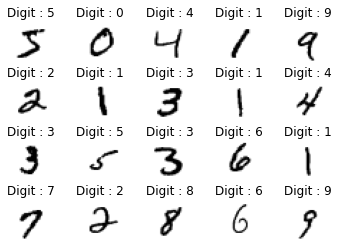

In [5]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [6]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [7]:
print('How image looks like : ')
print(train_img[0])

How image looks like : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

Text(0.5, 0, 'Intensity')

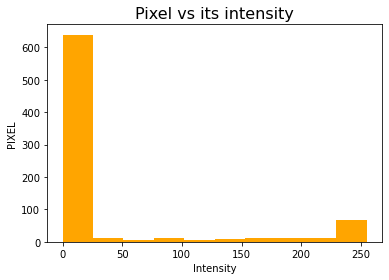

In [8]:
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

In [9]:
train_img=train_img/255.0
test_img=test_img/255.0

In [10]:
print('How image looks like after normalising: ')
print(train_img[0])

How image looks like after normalising: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0. 

# Reshaping Dataset

Text(0.5, 0, 'Intensity')

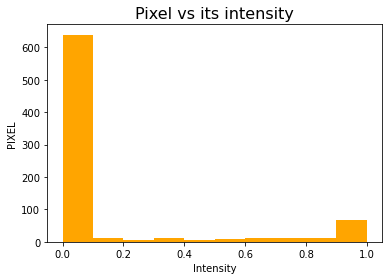

In [11]:
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

# Add CNN Layers

In [79]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

# Compiling the model

In [13]:
#compiling the sequential model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model

In [14]:
model.fit(train_img,train_lab,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1838 - accuracy: 0.9444
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0805 - accuracy: 0.9746
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0555 - accuracy: 0.9823
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0427 - accuracy: 0.9857
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0345 - accuracy: 0.9885
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0285 - accuracy: 0.9909
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0247 - accuracy: 0.9919
Epoch 8/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0220 - accuracy: 0.9929
Epoch 9/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0187 - accuracy: 0.9946
Epoch 10/50
1875/1875 [==============================] - 10s 6ms/step - l

# Save The model

In [15]:
model.save('project.h5')

In [16]:
!tar -zcvf project.tgz project.h5

project.h5


In [17]:
ls -1

project.h5
project.tgz


In [18]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 18.8 MB/s eta 0:00:01


# Cloud Deployment

In [38]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":""
}

client = APIClient(wml_credentials)

In [46]:
client = APIClient(wml_credentials)

In [44]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [53]:
space_uid = guid_from_space_name(client, "handwritten-digit-recognition")
print("Space UID = " + space_uid)

Space UID = 7c969e94-0a62-4ce0-9390-fdc32f6be85f


In [54]:
client.set.default_space(space_uid)

'SUCCESS'

In [55]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [56]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [57]:
model_details = client.repository.store_model(model='project.tgz',meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid}
                                             )

model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [58]:
model_id

'40ea5a7a-fc21-493a-b043-d14aaf7c48df'

In [59]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 1s - loss: 0.2674 - accuracy: 0.9820 - 744ms/epoch - 2ms/step
Test Loss 0.26743024587631226
Test Accuracy 0.9819999933242798


313/313 [==============================] - 1s 2ms/step
Predicted Value:  7
Successful prediction


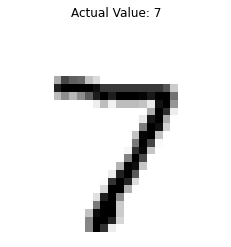

In [60]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 1s 2ms/step
Predicted Value:  2
Successful prediction


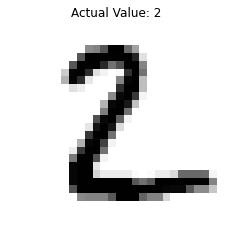

In [61]:
plt.imshow(test_img[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[1]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(test_lab[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 1s 2ms/step
Predicted Value:  1
Successful prediction


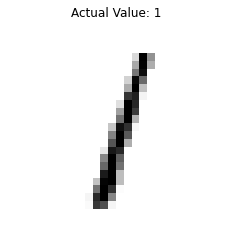

In [62]:
plt.imshow(test_img[2],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[2]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[2]))
if(test_lab[2]==(np.argmax(prediction[2]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

In [63]:
# make a prediction for a new image.
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
#from keras.models import load_model
from tensorflow.keras.utils import load_img
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [66]:
model=tf.keras.models.load_model('project.h5')      

In [67]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/home/wsuser/work/DigitRecog_IBM_model.tar.gz'

In [68]:
ls

DigitRecog_IBM_model.tar.gz  project.h5  project.tgz


# Test the model

In [69]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [71]:
model = load_model("project.h5")

In [72]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='is_QZGPyU8oxZr3W-td-LCHXS3QPMaWArILi18FdSyGT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittenimagerecognition-donotdelete-pr-8tlrnykut46vpi'
object_key = 'mnist-dataset-1024x424 (2).png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [73]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [74]:
img

In [75]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [76]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 71ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [77]:
print(np.argmax(pred, axis=1)) #printing our Labels

[0]
